## Preprocess AnnData

Notebook to pre-process thalamic scRNAseq development data

In [2]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc

In [3]:
# Load in AnnData object
devData = sc.read("../Data/devData.h5ad")

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [5]:
# Compute highly variable genes (Seurat package)
sc.pp.highly_variable_genes(devData)

In [6]:
devData.var

,highly_variable,means,dispersions,dispersions_norm
gene,,,,
Xkr4,False,3.107062e+00,1.976184,1.311195
Gm1992,False,1.576472e+00,2.348217,-0.551432
Gm19938,False,2.087060e+00,2.228991,-0.260070
Gm37381,False,2.598610e-02,2.667029,0.367459
Rp1,True,2.514481e-01,2.744843,0.568145
...,...,...,...,...
AC124606.1,False,1.000000e-12,NaN,0.000000
AC133095.2,False,1.000000e-12,NaN,0.000000
AC133095.1,False,1.000000e-12,NaN,0.000000


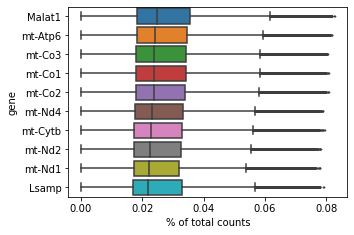

In [7]:
sc.pl.highest_expr_genes(devData, n_top=10)

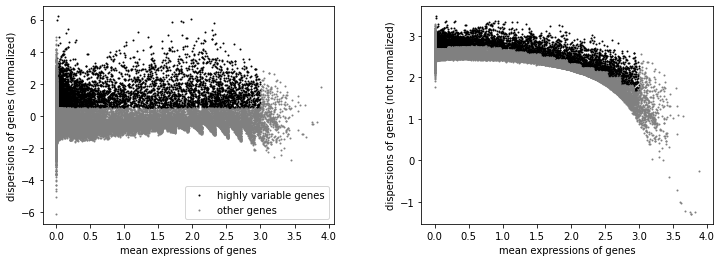

In [8]:
sc.pl.highly_variable_genes(devData)

In [9]:
# Get umap embedding. Requires computing neighborhood map, which by default uses PCA pre-process. 
sc.pp.pca(devData)
sc.pp.neighbors(devData)
sc.tl.umap(devData)

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


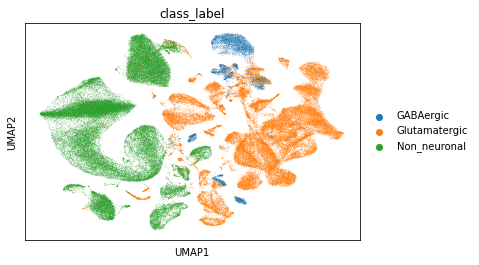

In [17]:
sc.pl.umap(devData, color="class_label")

In [11]:
# Save file
fnResults = "../Data/devData.h5ad"
devData.write(fnResults)